In [19]:
import os
par_working_dir = "/Users/musatahir/CS2060/Multiclass-Classification-Algorithm"
os.chdir(par_working_dir)
print("Current working directory:", os.getcwd())

import pandas as pd
from src.one_vs_all import OneVsAllLogisticRegression
from src.binary_logistic_regression import BinaryLogisticRegression
from sklearn.model_selection import train_test_split
import random
import numpy as np

Current working directory: /Users/musatahir/CS2060/Multiclass-Classification-Algorithm


In [25]:

data = pd.read_csv("./data/processed/obesity_standardized.csv")

n_classes = 7
n_features = 13
batch_size = 1
model = OneVsAllLogisticRegression(n_classes=n_classes, binary_classifier_class=BinaryLogisticRegression,
            n_features=n_features,
            batch_size=batch_size,
            random_state=42, max_epochs = 1000
        )

X = data.drop('NObeyesdad', axis=1).values
y = data['NObeyesdad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.train(X_train, y_train)
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
# for class_i, mod in model.classifiers.items():
#     preds = mod.predict(X_train)
#     print(mod.loss(X_test, preds))



Training Accuracy: 73.26%
Test Accuracy: 73.21%


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# One-vs-All logistic regression
model_ova = LogisticRegression(multi_class='ovr', solver='saga', max_iter=1000, random_state=42)
model_ova.fit(X_train, y_train)


# Evaluate on training and test data
y_train_pred = model_ova.predict(X_train)
y_test_pred = model_ova.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred) 
test_acc = accuracy_score(y_test, y_test_pred) 

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print("Number of iterations performed for each class:", model_ova.n_iter_)

from sklearn.metrics import accuracy_score, log_loss
import numpy as np


# # Calculate per-class loss
# prob_train = model_ova.predict_proba(X_train)  # Probability predictions for training data
# prob_test = model_ova.predict_proba(X_test)    # Probability predictions for test data

# for class_i in range(len(model_ova.classes_)):
#     # Binary labels for class_i
#     y_train_binary = (y_train == class_i).astype(int)
#     y_test_binary = (y_test == class_i).astype(int)

#     # Compute log loss for training and test sets
#     train_loss = log_loss(y_train_binary, prob_train[:, class_i])
#     test_loss = log_loss(y_test_binary, prob_test[:, class_i])

#     # Print results
#     print(f"Binary Classifier (Class {class_i} vs Rest):")
#     print(f"  Training Loss: {train_loss:.4f}")
#     print(f"  Test Loss: {test_loss:.4f}")

Training Accuracy: 73.50%
Test Accuracy: 71.53%
Number of iterations performed for each class: [110  26  20  46  46 118 193]


/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


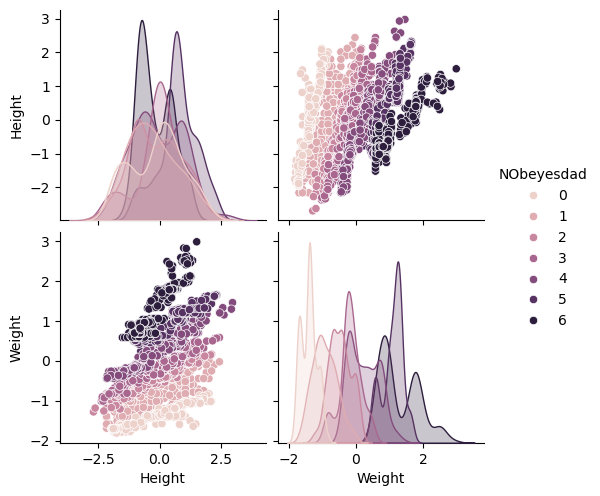

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for two features and class
sns.pairplot(data, vars=["Height", "Weight"], hue="NObeyesdad")
plt.show()